# Business Understanding

# Data Understanding


# Data Analysis

In [81]:
#import the libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')
import plotly.express as px

In [82]:
# read CSV file
df=pd.read_csv('data/kc_house_data.csv', index_col=0)

In [83]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [84]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [85]:
df.median()

price            450000.0000
bedrooms              3.0000
bathrooms             2.2500
sqft_living        1910.0000
sqft_lot           7618.0000
floors                1.5000
sqft_above         1560.0000
yr_built           1975.0000
yr_renovated          0.0000
zipcode           98065.0000
lat                  47.5718
long               -122.2310
sqft_living15      1840.0000
sqft_lot15         7620.0000
dtype: float64

In [86]:
df.drop(columns=['waterfront','yr_renovated','view','lat','long']) 
#dropped collumns to not use that data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,98178,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,98125,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,98028,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,98136,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,Average,8 Good,1530,0.0,2009,98103,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,Average,8 Good,2310,0.0,2014,98146,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,Average,7 Average,1020,0.0,2009,98144,1020,2007


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [88]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [89]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [90]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

# Data Exploration

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

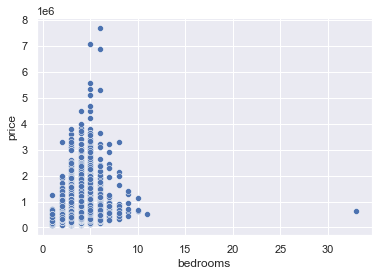

In [91]:
sns.scatterplot(x = df['bedrooms'], y=df['price'])
#Optimum amount of bedrooms is 5-6

In [92]:
#Checking for obvious outliers:
#bedrooms has an entry for 33 max bedrooms but the mean is 3.37. 
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [93]:
#Checking for obvious outliers:
#bedrooms has an entry for 33 max bedrooms but the mean is 3.37. 
#there's' only 1 house that has 33 bedrooms so we'll take a look at that specific row
df.loc[df['bedrooms'] > 12]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [94]:
# we dropped the house with 33 max bedrooms

df=df.drop(2402100895)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

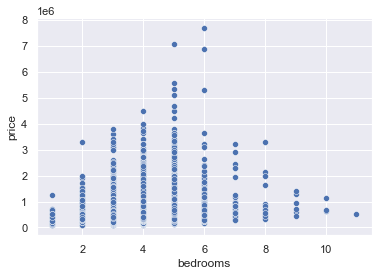

In [95]:
sns.scatterplot(x = df['bedrooms'], y=df['price'])

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

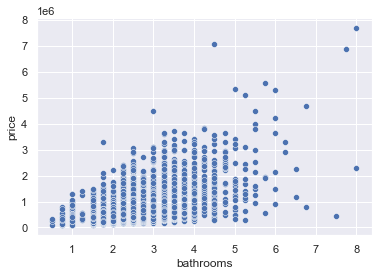

In [96]:
#Scatterplot for bathrooms vs price
sns.scatterplot(x=df['bathrooms'], y=df['price'])


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

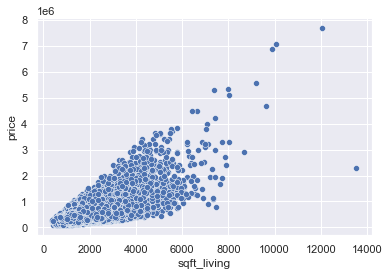

In [97]:
#Scatterplot for sqft_living and price
sns.scatterplot(x=df['sqft_living'], y=df['price'])


In [98]:
df['sqft_living'].max()

13540

In [99]:
df.loc[df['sqft_living'] == 13540]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,NO,EXCELLENT,Average,12 Luxury,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

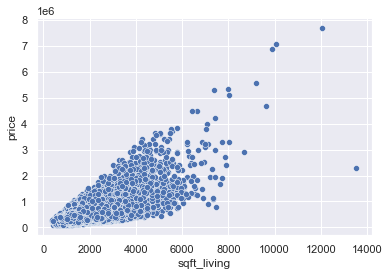

In [100]:
sns.scatterplot(x=df['sqft_living'], y=df['price'])

In [101]:
df=df.drop(1225069038)

# We dropped the outlier included in this price x sqft_living graph.

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

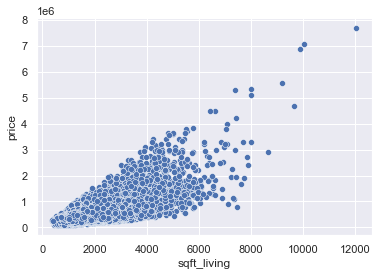

In [102]:
sns.scatterplot(x=df['sqft_living'], y=df['price'])

### Target Variable:
Let's have a first look of the main statistics of the variable we are trying to predict: house prices.

In [103]:
df['price'].describe()

count    2.159500e+04
mean     5.402114e+05
std      3.671937e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [104]:
price_median = df['price'].median()
price_median

450000.0

There is some informartion we can interpret here:
The mean value of homes of 540,296 is greater than the median of 450,000. This is an indication that the response variable is positively skewed. When this happens, regressing the log of price usually provides a better fitting, compared to the original price;
The maximum house price is listed as 7,700.000 and the minimum price is 78,000.

/Users/jc/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



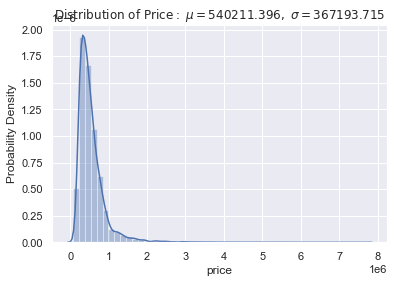

In [105]:
mu = df['price'].mean()
sigma = df['price'].std()
plt.xlabel('House Price')
plt.ylabel('Probability Density')

plt.title(r'$\mathrm{Distribution\ of\ Price:}\ \mu=%.3f,\ \sigma=%.3f$'%(mu,sigma))
sns.distplot(df['price']);

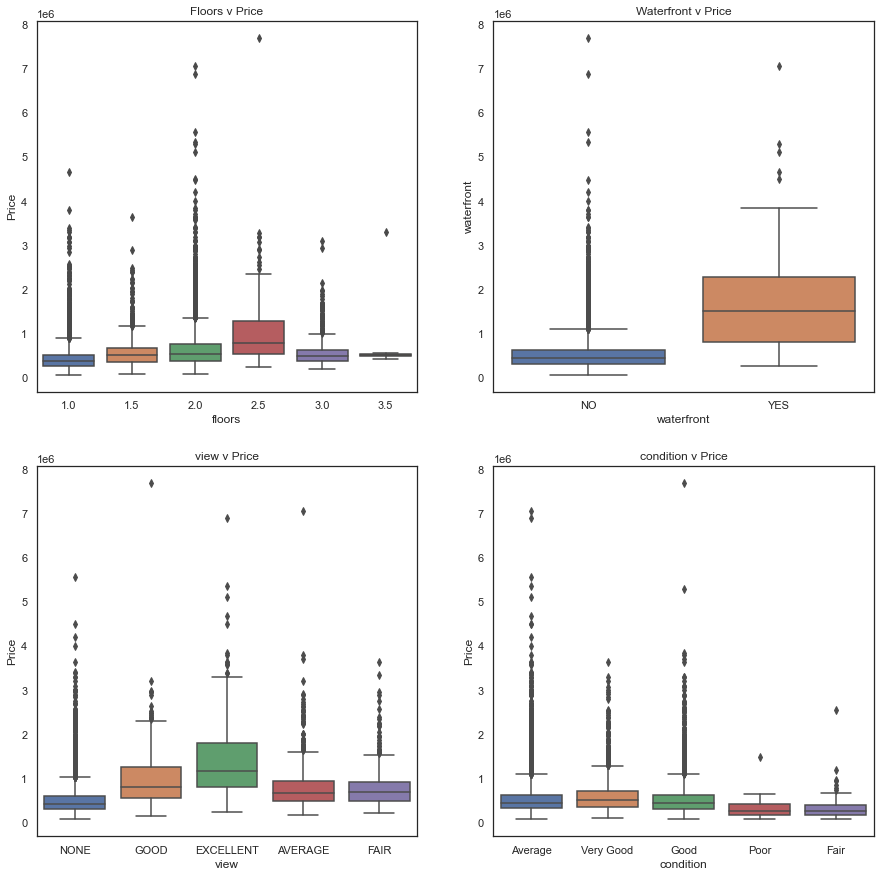

In [106]:
# Suplots of categorical features v price

sns.set_style('white')
f, axes = plt.subplots(2,2, figsize = (15,15))


# Plot [0,0]
sns.boxplot(data = df, x = 'floors', y = 'price', ax = axes[0,0])
axes[0,0].set_xlabel('floors')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Floors v Price')

# Plot [0,1]
sns.boxplot(x = 'waterfront', y = 'price', data = df, ax = axes[0,1])
axes[0,1].set_xlabel('waterfront')
axes[0,1].set_ylabel('waterfront')
axes[0,1].set_title('Waterfront v Price')

# Plot [1,0]
sns.boxplot(x = 'view', y = 'price', data = df, ax = axes[1,0])
axes[1,0].set_xlabel('view')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('view v Price')

# Plot [1,1]
sns.boxplot(x = 'condition', y = 'price', data = df, ax = axes[1,1])
axes[1,1].set_xlabel('condition')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('condition v Price');


# Data cleaning:

Let's have a first look of the main statistics of the variable we are trying to predict: house prices.

In [107]:
df['price'].describe()

count    2.159500e+04
mean     5.402114e+05
std      3.671937e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

There is some informartion we can interpret here:
The mean value of homes of 540,296 is greater than the median of 450,000. This is an indication that the response variable is positively skewed. When this happens, regressing the log of price usually provides a better fitting, compared to the original price;
The maximum house price is listed as 7,700.000 and the minimum price is 78,000.

In [108]:
#Look at the view column:
df['view'].value_counts()

NONE         19421
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      316
Name: view, dtype: int64

In [109]:
#We will check the view column to see how many null values it holds:
df['view'].isna().sum()

63

In [110]:
#fill the null values with None:
df['view'] = df['view'].fillna('NONE')
df['view'].isna().sum()

0

Since view is a categorical data we are going to convert it into numerical data:

In [111]:
# we are going to map our caterogical values to numerical values:
view_numerical = {'NONE': 1,
            'FAIR': 2,
             'AVERAGE':3,
            'GOOD': 4,
            'EXCELLENT': 5}
df['view'].replace(view_numerical, inplace=True)

In [112]:
# let's look at where the houses with most excellent views are:
fig_view = px.scatter_mapbox(df[df['view']== 5],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=7)
#plt.title('View')
fig_view.update_layout(mapbox_style='open-street-map')

plt.savefig('View.pdf')

fig_view.show()

<Figure size 432x288 with 0 Axes>

Checking for grade: This is also a categorical data we are going to replace it with numerical values.

In [113]:
#checking for the values in grade columns:
df['grade'].value_counts()

7 Average        8973
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

# Data Preparation

In [114]:
#mapping these to numerical values:
grade_numerical = {'3 Poor': 3,
             '4 Low': 4,
             '5 Fair': 5,
             '6 Low Average': 6,
             '7 Average': 7,
             '8 Good': 8,
             '9 Better': 9,
             '10 Very Good': 10,
             '11 Excellent': 11,
             '12 Luxury': 12,
             '13 Mansion': 13 }
df['grade'].replace(grade_numerical,inplace = True)

In [115]:
# We are goiing to check for condition column
df['condition'].value_counts()

Average      14019
Good          5677
Very Good     1700
Fair           170
Poor            29
Name: condition, dtype: int64

In [116]:
#mapping the categorical values to numerical valeus:
condition_numerical = {'Poor': 1,
             'Fair': 2,
             'Average': 3,
             'Good': 4,
             'Very Good': 5}
df['condition'].replace(condition_numerical,inplace = True)

In [117]:
#Lets have a look at the waterfront column:
df['waterfront'].value_counts()

NO     19073
YES      146
Name: waterfront, dtype: int64

In [41]:
df['waterfront'].isna().sum()

2376

In [42]:
#let's fill the waterfront missing values:
df['waterfront'] = df['waterfront'].fillna('NONE')
df['waterfront'].isna().sum()

0

In [43]:
#We will map the values of NO,Yes to numerical values:
waterfront_numerical = {'NONE': 0,
                        'YES': 1,
                         'NO':2,
                        }
df['waterfront'].replace(waterfront_numerical,inplace = True)

In [44]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,1,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,2,1,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,2,1,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,2,1,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,2,1,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [45]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,17754.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.402160e+05,3.371643,2.115554,2079.791211,1.508586e+04,1.494027,1.773199,1.233006,3.409844,7.657714,1788.243934,1970.998379,83.641489,98077.953001,47.560088,-122.213993,1986.487729,12748.789081
std,3.671858e+05,0.903780,0.767959,914.809475,4.136568e+04,0.539598,0.628825,0.764261,0.650555,1.172855,826.152557,29.375296,399.957185,53.514042,0.138553,0.140718,684.969238,27239.359330
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,2.000000,1.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,2.000000,1.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068425e+04,2.000000,2.000000,1.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10080.750000
max,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,2.000000,5.000000,5.000000,13.000000,8860.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


we want to see where the houses with mean prices lie:
Mean of house prices is around 540,000.

In [46]:
fig = px.scatter_mapbox(df[df['price'] < 600000],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig.update_layout(mapbox_style='open-street-map')
plt.savefig('Mean_house_locations.pdf')
fig.show()

<Figure size 432x288 with 0 Axes>

The above figure shows the areas that contain house's with mean prices of around 540,000 which seems to be mostly conecntrated around Redmond,Sammamish,Issaquah.

We will take a look at the scatter plots of each variable compared to price to see if there are any linear trends.
We look at continuous and categorical variables separately.

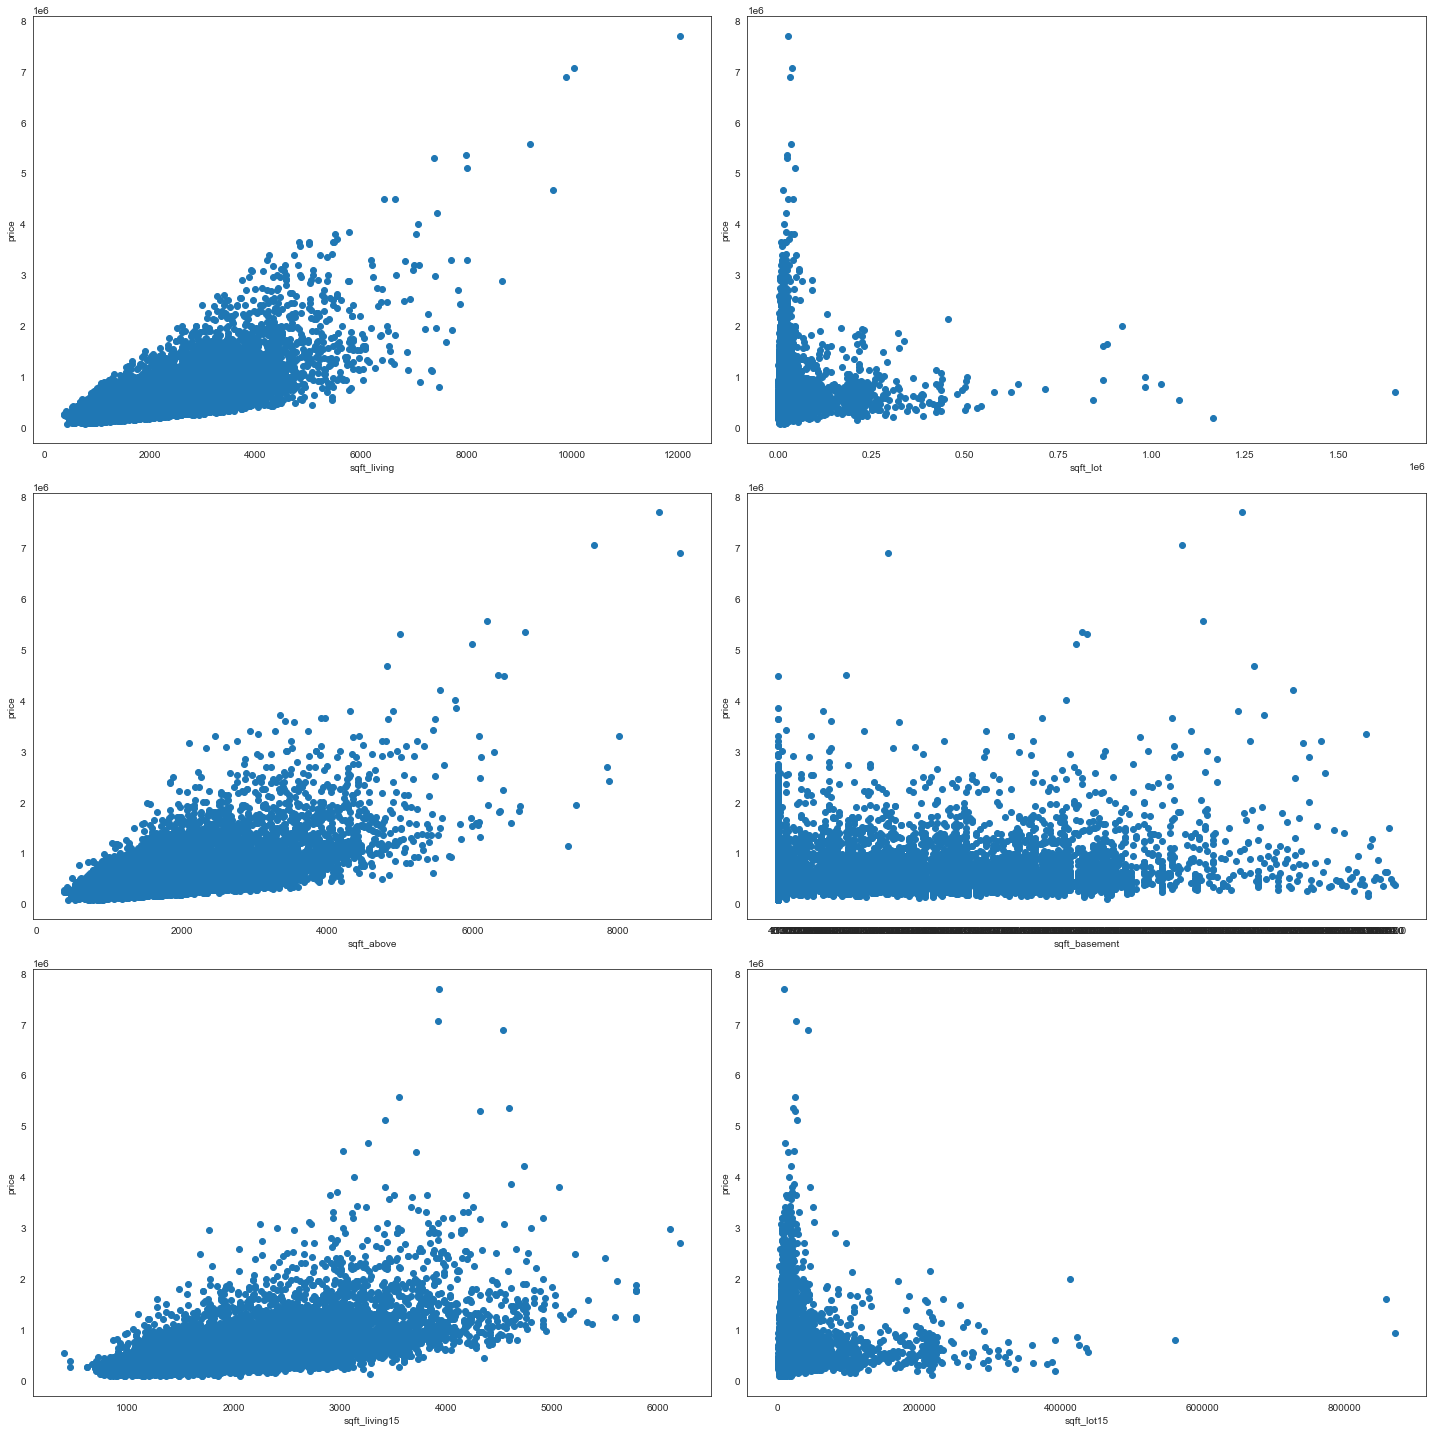

In [47]:
#Let's look at continous variables first:
cont_columns = [ 'sqft_living', 'sqft_lot',
               'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']
plt.figure(figsize=(20,20))
for i in range(0, 6):
    plt.subplot(3, 2, i+1)
    plt.scatter(df[cont_columns[i]], df['price'])
    plt.xlabel(cont_columns[i])
    plt.ylabel('price')
plt.savefig('Continous_variables_linearTrends.pdf')    
plt.tight_layout()

Looking at the scatter plots we can observe that sqft_living has a positive correlation with Price(given few outliers). As thes size of house increases it tends to cost more.
Lot sizes seem to be negatively correlated with housing prices.
Suprisingly, sqft_basement do not seem to have a strong correlation with price.
Sqft_above has a high positive coorelation with price indicating that people prefer houses with more living space than basement.

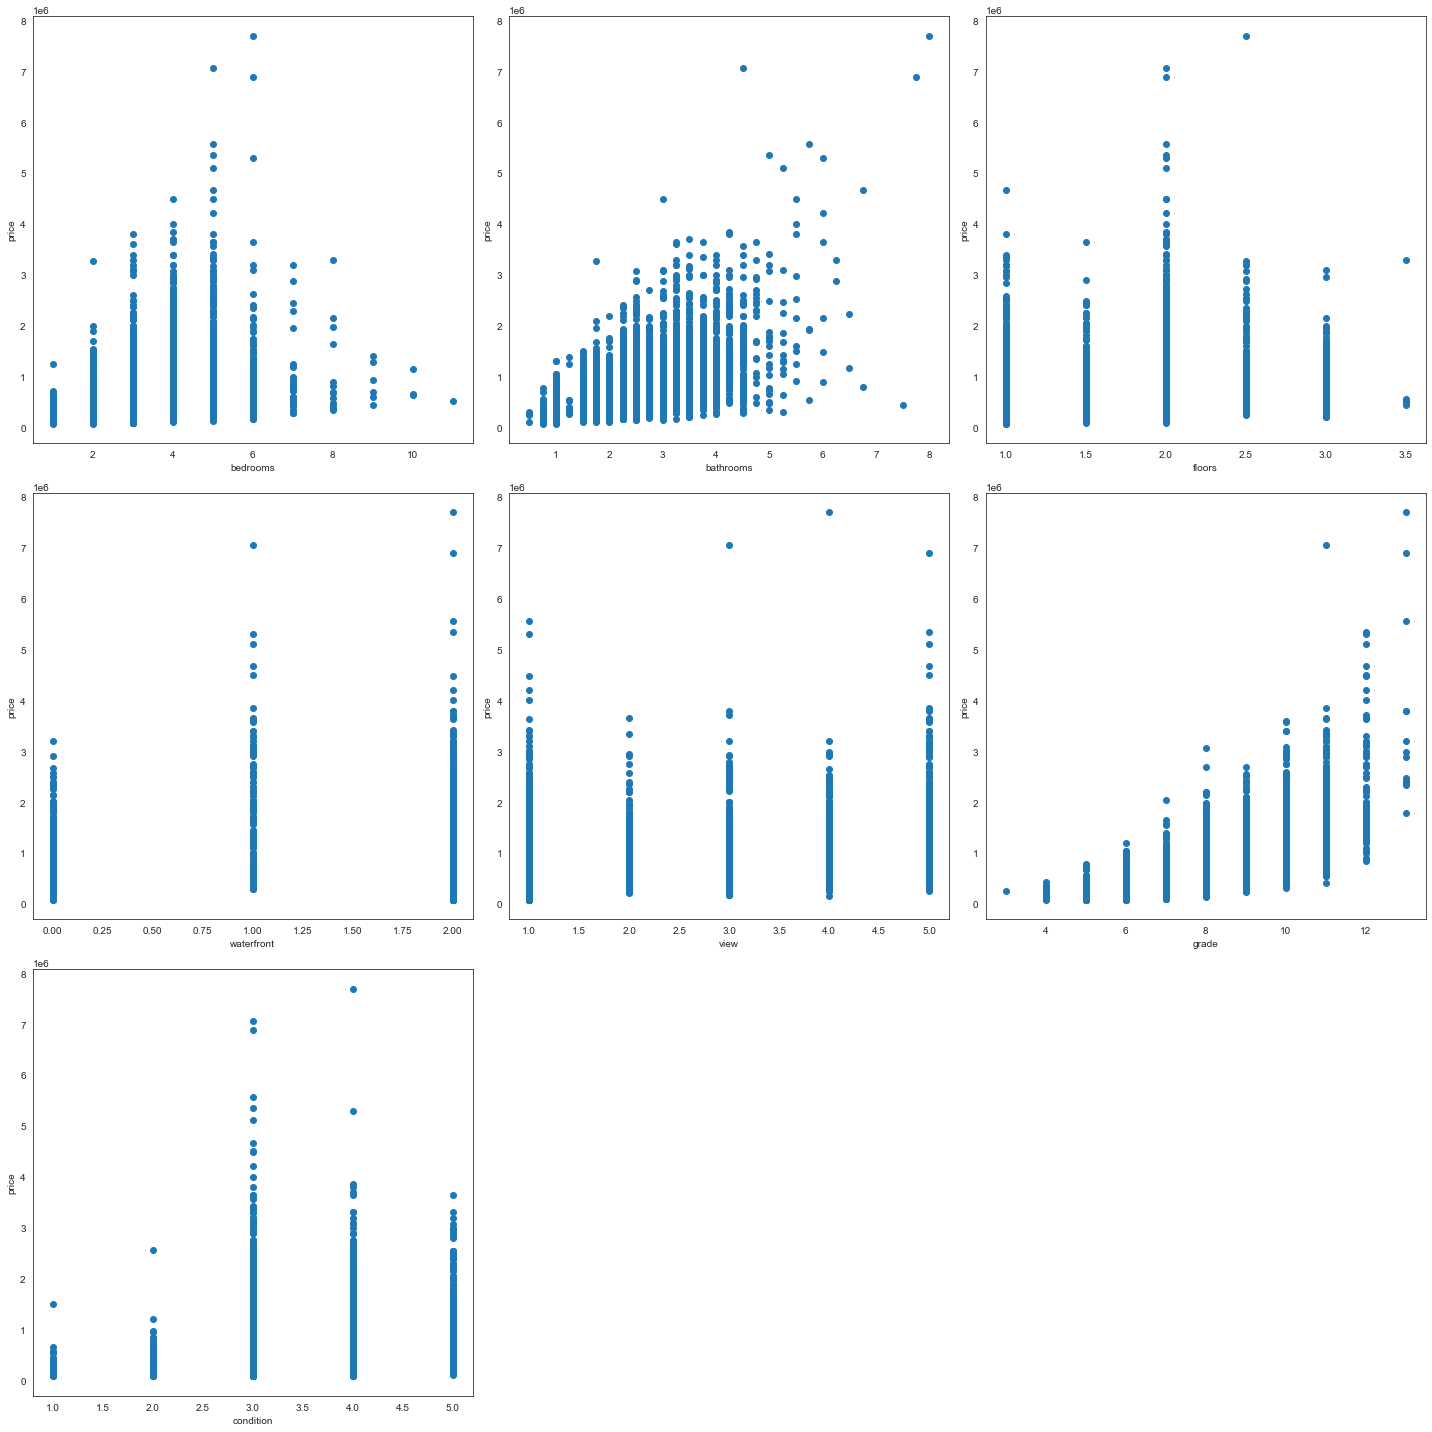

In [48]:
#Lets have a look at catergorical data columns:
categorical_columns =  [ 'bedrooms', 'bathrooms',
               'floors', 'waterfront','view', 'grade','condition']
plt.figure(figsize=(20,20))
for i in range(0, 7):
    plt.subplot(3, 3, i+1)
    plt.scatter(df[categorical_columns[i]], df['price'])
    plt.xlabel(categorical_columns[i])
    plt.ylabel('price')
plt.savefig('Categorical_variables_linearTrends.pdf')    
plt.tight_layout()

This categorical scatter plot shows us the positive coorelation between Bathrooms and grade. 
The number of bedrooms is linear up to 6 bedrooms. 
Also, Condition of a house is linear till 3 and then it starts to decrease.
The linearity for the number of bathrooms becomes less consistent for houses with more than 5 bathrooms.

In [49]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,1,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,2,1,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,2,1,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,2,1,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,2,1,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Now, that our dataframe is ready we are going to start building our model.

Model Building:

Before running a regression model with this data, we need to select which variables we believe will be the best predictors. We can eliminate variables by looking at collinearity between variables and choosing to drop one of those variables. We will choose to use a Pearson's correlation coefficient of 0.7 as the initial cutoff value.

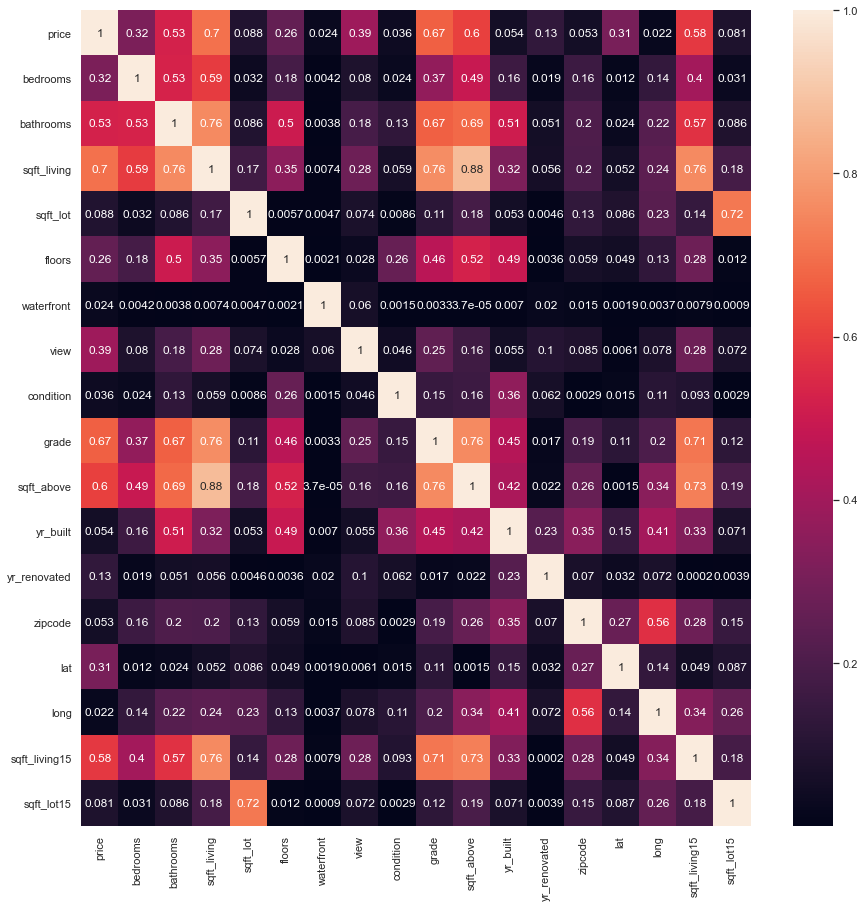

In [57]:
plt.figure(figsize = (15,15))
sns.set(style = "white")
sns.heatmap(df.corr().abs(), annot = True)
plt.savefig("Intial_Heatmap")

**HeatMap Analysis:**

Sqft_living has the highest correlation with price! 

## Construction of Models:

### Model 1: For this model, we shall be comparing the influence that the variables of sqft_living, bedrooms, and/or bathrooms have on price.

*df_model = 'price ~ 'sqft_living', 'bedrooms','bathrooms'*

### Model 2: For this 2nd model, we shall be comparing the same variables from model 1 and also grade,  yr_built, sqft_basements, yr_renovated, waterfront, condition, and/or sqft_lot. 

*df_model2 = price'sqft_living','bedrooms','bathrooms','floors','view','grade','yr_built',
            sqft_basement,'yr_renovated,'waterfront','condition',sqft_lot'*            

## Independent Variables & Their Relation To Price: Model 1

In [121]:
#Selecting the features we are interested in:
df_model1 = df.drop(['sqft_lot','floors','waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_basement','yr_renovated', 'zipcode', 'lat','long','sqft_living15','sqft_lot15'],axis=1)







In [122]:
df_model1

,date,price,bedrooms,bathrooms,sqft_living
id,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180
6414100192,12/9/2014,538000.0,3,2.25,2570
5631500400,2/25/2015,180000.0,2,1.00,770
2487200875,12/9/2014,604000.0,4,3.00,1960
1954400510,2/18/2015,510000.0,3,2.00,1680
...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530
6600060120,2/23/2015,400000.0,4,2.50,2310
1523300141,6/23/2014,402101.0,2,0.75,1020


## Test/Train Split: Model 1


Test Train Split: 20% of our data shall be used for testing and 80% will be used for training.

In [123]:
X = df_model1.drop('price', axis=1)
y = df['price']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,date,bedrooms,bathrooms,sqft_living
id,,,,
9272201318,4/14/2015,3,2.00,1580
9834201100,12/22/2014,4,2.00,1440
7795810110,5/12/2015,3,1.75,1430
1853081250,12/29/2014,4,2.75,3120
9560800390,5/16/2014,3,2.25,1990
...,...,...,...,...
7853230570,9/15/2014,3,2.50,2230
8672200110,3/17/2015,5,3.75,4170
8658300480,7/21/2014,4,1.50,1530


## Modeless Baseline: Model 1

In [125]:
base_train_mean = y_train.mean()
base_train_mean

542760.0868256541

In [126]:
base_train_preds = [base_train_mean] * len(y_train)
base_test_preds = [base_train_mean] * len(y_test)

In [127]:
print(f"Train R2: {r2_score(y_train, base_train_preds)}")
print(f"Test R2: {r2_score(y_test, base_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, base_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, base_test_preds, squared = False)}")

Train R2: 0.0
Test R2: -0.0012786520775589505
----
Train RMSE: 369793.74980708165
Test RMSE: 356605.82524093846


**This baseline model predicts that each house would have a value of the mean for this area. Since the model has a very low R2 and predicts that this is off by ~361 thousand dollars on average.**

## Independent Variables & Their Relation To Price: Model 1

In [128]:
# create a dataframe for training data
df_train1 =pd.concat([y_train, X_train], axis = 1)
df_train1

,price,date,bedrooms,bathrooms,sqft_living
id,,,,,
9272201318,540000.0,4/14/2015,3,2.00,1580
9834201100,332500.0,12/22/2014,4,2.00,1440
7795810110,390000.0,5/12/2015,3,1.75,1430
1853081250,800000.0,12/29/2014,4,2.75,3120
9560800390,445000.0,5/16/2014,3,2.25,1990
...,...,...,...,...,...
7853230570,440000.0,9/15/2014,3,2.50,2230
8672200110,1090000.0,3/17/2015,5,3.75,4170
8658300480,299800.0,7/21/2014,4,1.50,1530


In [129]:
df_model1.corr()['price'].sort_values(ascending=False)

price          1.000000
sqft_living    0.702092
bathrooms      0.525222
bedrooms       0.315362
Name: price, dtype: float64

Out of the 3 variables we compared to price, sqft_living has the highest correlation.



<AxesSubplot:>

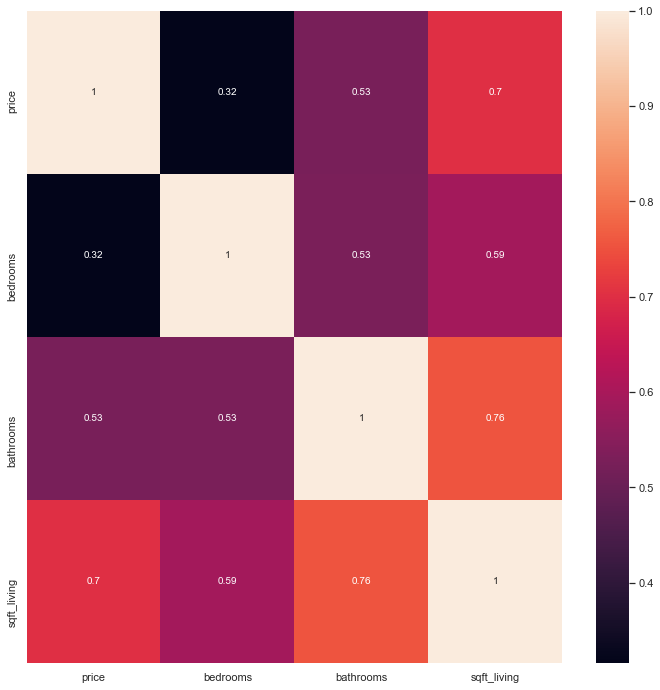

In [130]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_model1.corr(), annot=True)

HeatMap Analysis:

Sqft_living has the highest correlation with price!

# Model 1: Base Model

*Sqft_living has the highest correlation with price so this shall be used for our model.*



In [131]:
model_price='price ~ sqft_living'
model_price = ols(model_price, df_model1).fit()
model_price_summ = model_price.summary()
model_price_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.099e+04
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:02:58   Log-Likelihood:            -3.0002e+05
No. Observations:               21595   AIC:                         6.000e+05
Df Residuals:                   21593   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.589e+04   4419.392    -10.385      0.000   -5.46e+04   -3.72e+04
sqft_living   281.8067      1.945    144.883      0.000     277.994     285.619
==============================================================================
Omnibus:                    14779.309   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           536721.604
Skew:                           2.817   Prob(JB):                         0.00
Kurtosis:                      26.765   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
model_price_train_preds = model_price.predict(X_train)
model_price_test_preds = model_price.predict(X_test)

In [133]:
print(f"Train R2: {r2_score(y_train, model_price_train_preds)}")
print(f"Test R2: {r2_score(y_test, model_price_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, model_price_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, model_price_test_preds, squared = False)}")

Train R2: 0.49559906485583616
Test R2: 0.48093490960020446
----
Train RMSE: 262631.9196390352
Test RMSE: 256756.7474829458


Interpretation of the above model:

Model_price1 shows variation over the base model:
R2 is 0.496 for training and 0.481 for test.
As for our model R2 seems low but RMSE is still high.
We will need to perform more iterations.

In [134]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,1,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,1,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,1,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,1,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,1,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Multiple Regression: Model 1

*Since we shall be iterating the model to train let's create functions to do that work.*

In [135]:
#this function will take variables and will give us the OLS results.
def model_base(ind_var, data):
    formula = 'price ~ ' + ' + '.join(ind_var)
    model_fit = ols(formula, data).fit()
    model_fit_summ = model_fit.summary()
    return model_fit,model_fit_summ

In [136]:
# function that does the assessment of the model
def assess(model):
    
    train_preds=model.predict(X_train)
    test_preds=model.predict(X_test)
    y_tr = y_train
    y_te = y_test
    print(f"Train R2: {r2_score(y_tr, train_preds)}")
    print(f"Test R2: {r2_score(y_te, test_preds)}")
    print('----')
    print(f"Train RMSE: {mean_squared_error(y_tr, train_preds, squared = False)}")
    print(f"Test RMSE: {mean_squared_error(y_te, test_preds, squared = False)}")

In [137]:
# the main function to model and asses the results
def main_model(ind_var,data):
    multi_model, multi_model_summ = model_base(ind_var,data)
    assessment = assess(multi_model)
    #scaled_summ = scaled_model(ind_var,data)
    print('        ')
    print('Model Summary:')
    print('        ')
    print(multi_model_summ)      
    print('        ')
    print('....................................................')
    print('Corelation Table between variables')
    print(data[ind_var].corr())    
    print('        ')
    print(assessment)

In [138]:
main_model(['sqft_living'],df_model1)

Train R2: 0.49559906485583616
Test R2: 0.48093490960020446
----
Train RMSE: 262631.9196390352
Test RMSE: 256756.7474829458
        
Model Summary:
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.099e+04
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:04:20   Log-Likelihood:            -3.0002e+05
No. Observations:               21595   AIC:                         6.000e+05
Df Residuals:                   21593   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t

Since, we want to keep our regression model simple we will add one more feature to our data: bedrooms
and see how the model performs.

In [139]:
#testing the model with 2 variables.
main_model(['sqft_living', 'bedrooms'],df_model1)

Train R2: 0.5116961661421559
Test R2: 0.49537837887168634
----
Train RMSE: 258407.2138792035
Test RMSE: 253159.29758949665
        
Model Summary:
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                 1.118e+04
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:04:27   Log-Likelihood:            -2.9968e+05
No. Observations:               21595   AIC:                         5.994e+05
Df Residuals:                   21592   BIC:                         5.994e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t

Adding bedrooms to the model has increased the R2 for training set from 0.493 to 0.509 and from 0.493 to 0.509.
But RMSE value seems to be high so we iterate the model again.

In [140]:
#let's try adding bathrooms as well
main_model(['sqft_living', 'bedrooms','bathrooms'],df_model1)

Train R2: 0.5117899494168656
Test R2: 0.49568140325459975
----
Train RMSE: 258382.3979380192
Test RMSE: 253083.27532177317
        
Model Summary:
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     7456.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:04:35   Log-Likelihood:            -2.9968e+05
No. Observations:               21595   AIC:                         5.994e+05
Df Residuals:                   21591   BIC:                         5.994e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t

Adding bathrooms doesn't seem to make any significant difference in the R2 values,let's look at other features.

R2 increased from ~0.493 to 0.509 in training and test data.
Since, models efficiency doesn't seems to increase we want to transform and scale the data before iterating again.
We will perform log transformations (base e) on all continuous variables as well as the target. Categorical variables will remain as is.

In [143]:
df_log = pd.DataFrame()
df_log['price'] = df_model1['price'].map(lambda x: np.log(x))
df_log['sqft_living'] = df_model1['sqft_living'].map(lambda x: np.log(x))
df_log['bedrooms'] = df_model1['bedrooms']
df_log['bathrooms'] = df_model1['bathrooms']
df_log.head()

,price,sqft_living,bedrooms,bathrooms
id,,,,
7129300520,12.309982,7.073270,3,1.00
6414100192,13.195614,7.851661,3,2.25
5631500400,12.100712,6.646391,2,1.00
2487200875,13.311329,7.580700,4,3.00
1954400510,13.142166,7.426549,3,2.00


In [144]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_log)
scaled_df = pd.DataFrame(scaled)
column_dict = dict(zip(scaled_df.columns, df_log.columns))

scaled_df.rename(columns=column_dict, inplace=True)
scaled_df.head()

,price,sqft_living,bedrooms,bathrooms
0,0.227669,0.332949,0.2,0.066667
1,0.420522,0.556412,0.2,0.233333
2,0.182099,0.210399,0.1,0.066667
3,0.445720,0.478623,0.3,0.333333
4,0.408883,0.434369,0.2,0.200000


In [146]:
main_model(['sqft_living', 'bedrooms','bathrooms'],scaled_df)

Train R2: -2.141321727256199
Test R2: -2.1984341995132657
----
Train RMSE: 655414.0930842338
Test RMSE: 637352.45802324
        
Model Summary:
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     6386.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:09:02   Log-Likelihood:                 22990.
No. Observations:               21595   AIC:                        -4.597e+04
Df Residuals:                   21591   BIC:                        -4.594e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|  

# Model 2:

*We will be looking at other categorical variable like grade, condition, waterfront how they work with price.*

In [147]:
#Since for this Model2 we need a new dataframe so we will be uploading and making a new test and training set.
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,1,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,1,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,1,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,1,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,1,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,1,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,1,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,1,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [148]:
X = df.drop('price', axis=1)
y = df['price']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [150]:
X_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
1697000370,3/25/2015,3,1.00,1040,8122,1.0,NO,1,5,7,1040,0.0,1971,0.0,98198,47.3731,-122.312,1470,8676
3905080280,3/4/2015,3,2.50,1880,4499,2.0,NO,1,3,8,1880,0.0,1993,0.0,98029,47.5664,-121.999,2130,5114
5466420030,10/7/2014,3,2.50,2020,6564,1.0,NO,1,3,7,1310,710.0,1994,0.0,98042,47.3545,-122.158,1710,5151
2623069010,1/16/2015,5,4.00,4720,493534,2.0,NO,1,5,9,3960,760.0,1975,0.0,98027,47.4536,-122.009,2160,219542
2652500740,6/18/2014,4,2.25,2190,4080,2.0,NO,1,3,8,1800,390.0,1918,0.0,98119,47.6425,-122.358,2100,4080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7853230570,9/15/2014,3,2.50,2230,5800,2.0,NO,1,3,7,2230,0.0,2004,0.0,98065,47.5308,-121.847,2230,6088
8672200110,3/17/2015,5,3.75,4170,8142,2.0,NO,3,3,10,4170,0.0,2006,NaN,98056,47.5354,-122.181,3030,7980
8658300480,7/21/2014,4,1.50,1530,9000,1.0,NO,1,4,6,1530,0.0,1976,0.0,98014,47.6492,-121.908,1520,8500


In [151]:
base_train_mean = y_train.mean()
base_train_mean

543303.2574709805

In [152]:
base_train_preds = [base_train_mean] * len(y_train)
base_test_preds = [base_train_mean] * len(y_test)

In [153]:
print(f"Train R2: {r2_score(y_train, base_train_preds)}")
print(f"Test R2: {r2_score(y_test, base_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, base_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, base_test_preds, squared = False)}")

Train R2: 0.0
Test R2: -0.001164501892552794
----
Train RMSE: 368714.2955544344
Test RMSE: 362612.29141276295


In [154]:
df_train=pd.concat([y_train, X_train], axis = 1)
df_train

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1697000370,234000.0,3/25/2015,3,1.00,1040,8122,1.0,NO,1,5,7,1040,0.0,1971,0.0,98198,47.3731,-122.312,1470,8676
3905080280,529000.0,3/4/2015,3,2.50,1880,4499,2.0,NO,1,3,8,1880,0.0,1993,0.0,98029,47.5664,-121.999,2130,5114
5466420030,253000.0,10/7/2014,3,2.50,2020,6564,1.0,NO,1,3,7,1310,710.0,1994,0.0,98042,47.3545,-122.158,1710,5151
2623069010,745000.0,1/16/2015,5,4.00,4720,493534,2.0,NO,1,5,9,3960,760.0,1975,0.0,98027,47.4536,-122.009,2160,219542
2652500740,855000.0,6/18/2014,4,2.25,2190,4080,2.0,NO,1,3,8,1800,390.0,1918,0.0,98119,47.6425,-122.358,2100,4080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7853230570,440000.0,9/15/2014,3,2.50,2230,5800,2.0,NO,1,3,7,2230,0.0,2004,0.0,98065,47.5308,-121.847,2230,6088
8672200110,1090000.0,3/17/2015,5,3.75,4170,8142,2.0,NO,3,3,10,4170,0.0,2006,NaN,98056,47.5354,-122.181,3030,7980
8658300480,299800.0,7/21/2014,4,1.50,1530,9000,1.0,NO,1,4,6,1530,0.0,1976,0.0,98014,47.6492,-121.908,1520,8500


In [155]:
df_model2 =df_train.drop(['date', 'sqft_living','lat' ,'long','sqft_basement'],axis=1)

In [156]:
df_model2.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.669421
sqft_above       0.603381
sqft_living15    0.590540
bathrooms        0.529581
view             0.399880
bedrooms         0.318156
floors           0.254563
yr_renovated     0.131064
sqft_lot         0.084421
sqft_lot15       0.080234
yr_built         0.049700
condition        0.041514
zipcode         -0.053939
Name: price, dtype: float64

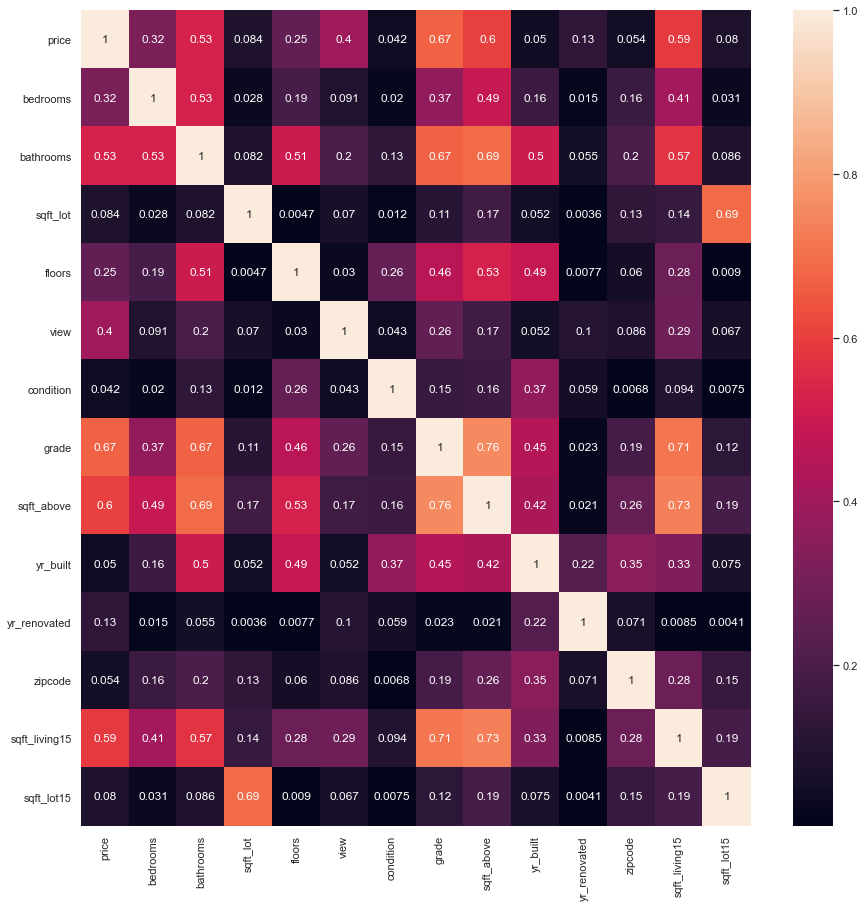

In [162]:
plt.figure(figsize = (15,15))
sns.set(style = "white")
sns.heatmap(df_model2.corr().abs(), annot = True)
plt.savefig("HeatMap_Model2")

HeatMap Analysis:
Grade of the house has the highest correlation with price.Waterfront and zipcode seems to have a negative coorelation.

In [164]:
main_model(['grade','sqft_above','view','waterfront','yr_built'],df_model2)

ValueError: cannot reindex from a duplicate axis

In [159]:
df_log = pd.DataFrame()
df_log['price'] = df_model2['price'].map(lambda x: np.log(x))
df_log['sqft_above'] = df_model2['sqft_above'].map(lambda x: np.log(x))
df_log['yr_built'] = df_model2['yr_built']
df_log['bathrooms'] = df_model2['bathrooms']
df_log['view'] = df_model2['view']
df_log['grade'] = df_model2['grade']
df_log['waterfront'] = df_model2['waterfront']
df_log.head()


,price,sqft_above,yr_built,bathrooms,view,grade,waterfront
id,,,,,,,
1697000370,12.363076,6.946976,1971,1.00,1,7,NO
3905080280,13.178744,7.539027,1993,2.50,1,8,NO
5466420030,12.441145,7.177782,1994,2.50,1,7,NO
2623069010,13.521139,8.283999,1975,4.00,1,9,NO
2652500740,13.658857,7.495542,1918,2.25,1,8,NO


In [160]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_log)
scaled_df1 = pd.DataFrame(scaled)
column_dict = dict(zip(scaled_df.columns, df_log.columns))

scaled_df1.rename(columns=column_dict, inplace=True)
scaled_df1.head()

ValueError: could not convert string to float: 'NO'

In [161]:
main_model(['grade','sqft_above','view','waterfront','bathrooms','yr_built'],scaled_df1)

NameError: name 'scaled_df1' is not defined

# Regression Results
